In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
!pip install pycaret
!pip install missingno

In [3]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings(action='ignore')

In [4]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)

    roc_auc = roc_auc_score(y_test, pred_proba)

    # ROC-AUC print
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    return confusion

In [5]:
diabetes_df = pd.read_csv("./diabetes.csv")
diabetes_df.head().T.style.set_properties(**{'background-color': 'grey',
                           'color': 'white',
                           'border-color': 'white'})


,0,1,2,3,4
Pregnancies,6.000000,1.000000,8.000000,1.000000,0.000000
Glucose,148.000000,85.000000,183.000000,89.000000,137.000000
BloodPressure,72.000000,66.000000,64.000000,66.000000,40.000000
SkinThickness,35.000000,29.000000,0.000000,23.000000,35.000000
Insulin,0.000000,0.000000,0.000000,94.000000,168.000000
BMI,33.600000,26.600000,23.300000,28.100000,43.100000
DiabetesPedigreeFunction,0.627000,0.351000,0.672000,0.167000,2.288000
Age,50.000000,31.000000,32.000000,21.000000,33.000000
Outcome,1.000000,0.000000,1.000000,0.000000,1.000000


In [6]:
diabetes_df.rename(columns ={"DiabetesPedigreeFunction":"DPF"},inplace=True)


<Axes: >

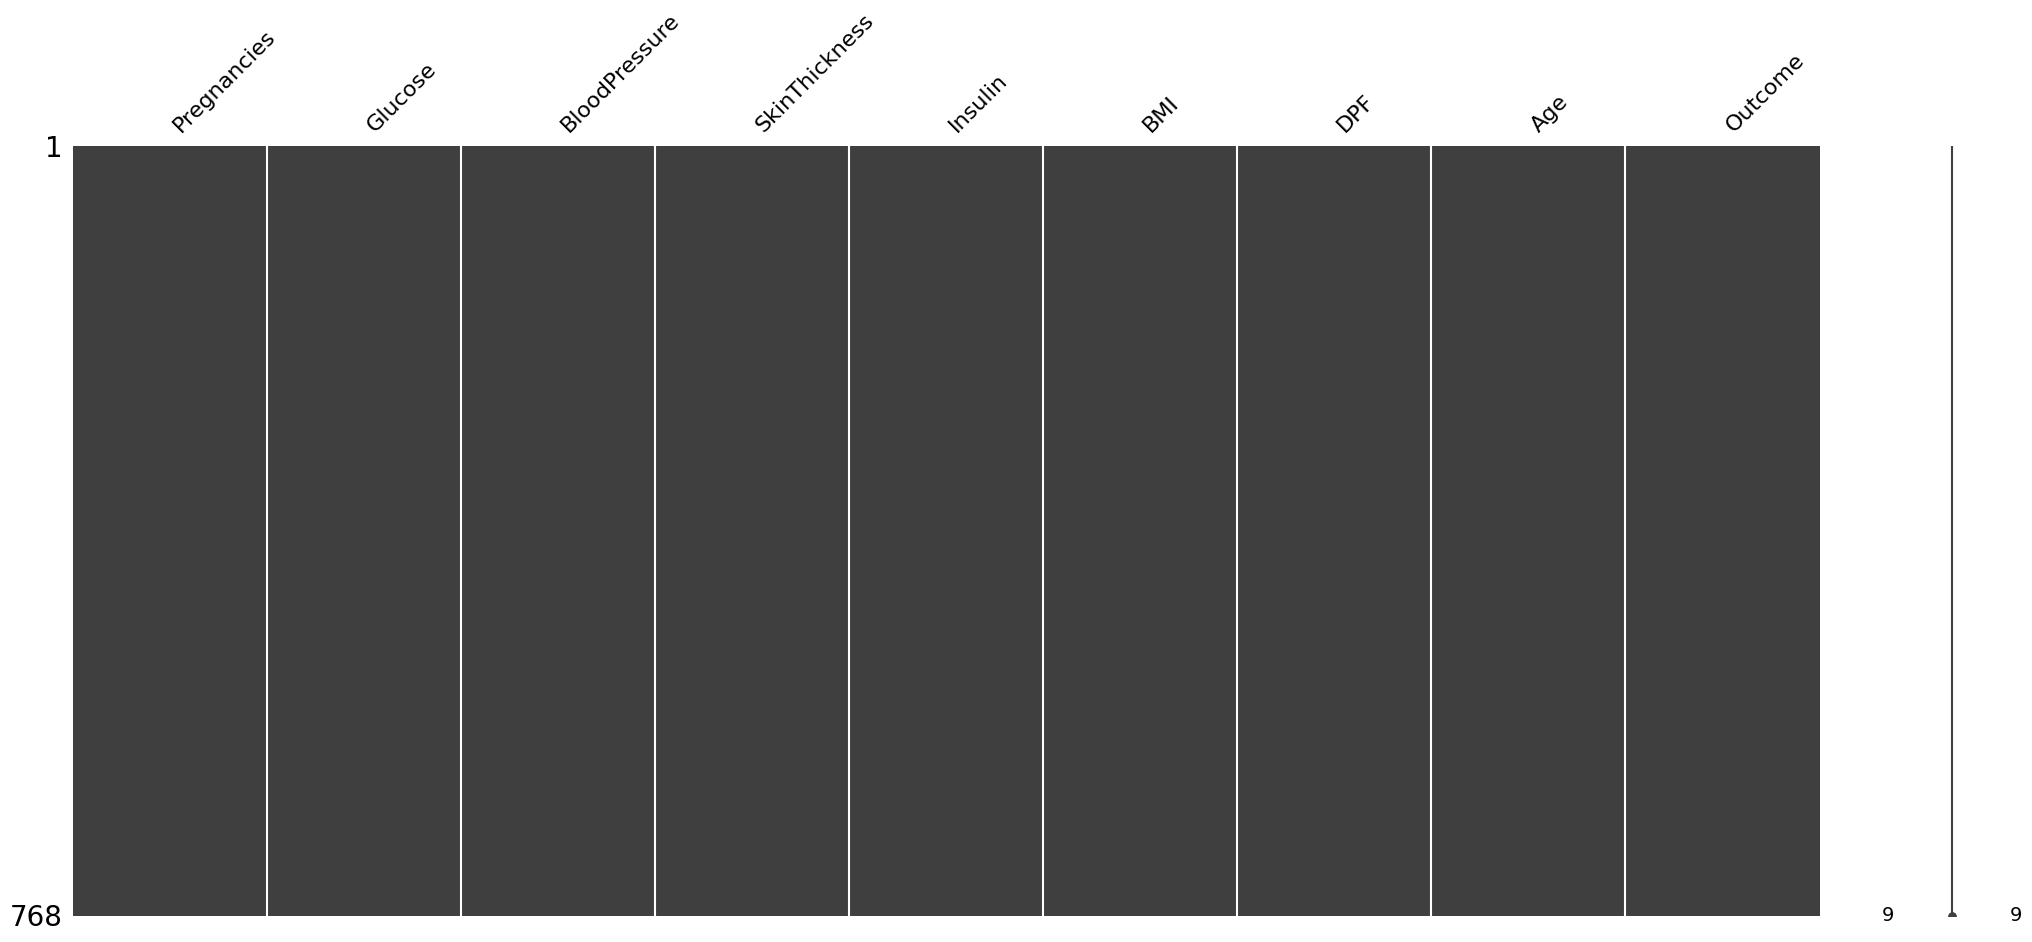

In [7]:
import missingno as msno
msno.matrix(diabetes_df)

In [8]:
colors = ['gold', 'mediumturquoise']
labels = ['0','1']
values = diabetes_df['Outcome'].value_counts()/diabetes_df['Outcome'].shape[0]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Outcome")
fig.show()


In [9]:
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

diabetes_df.describe().style.apply(highlight_min, props='color:Black;background-color:Grey', axis=0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
feature_names = [cname for cname in diabetes_df.loc[:,:'Age'].columns]

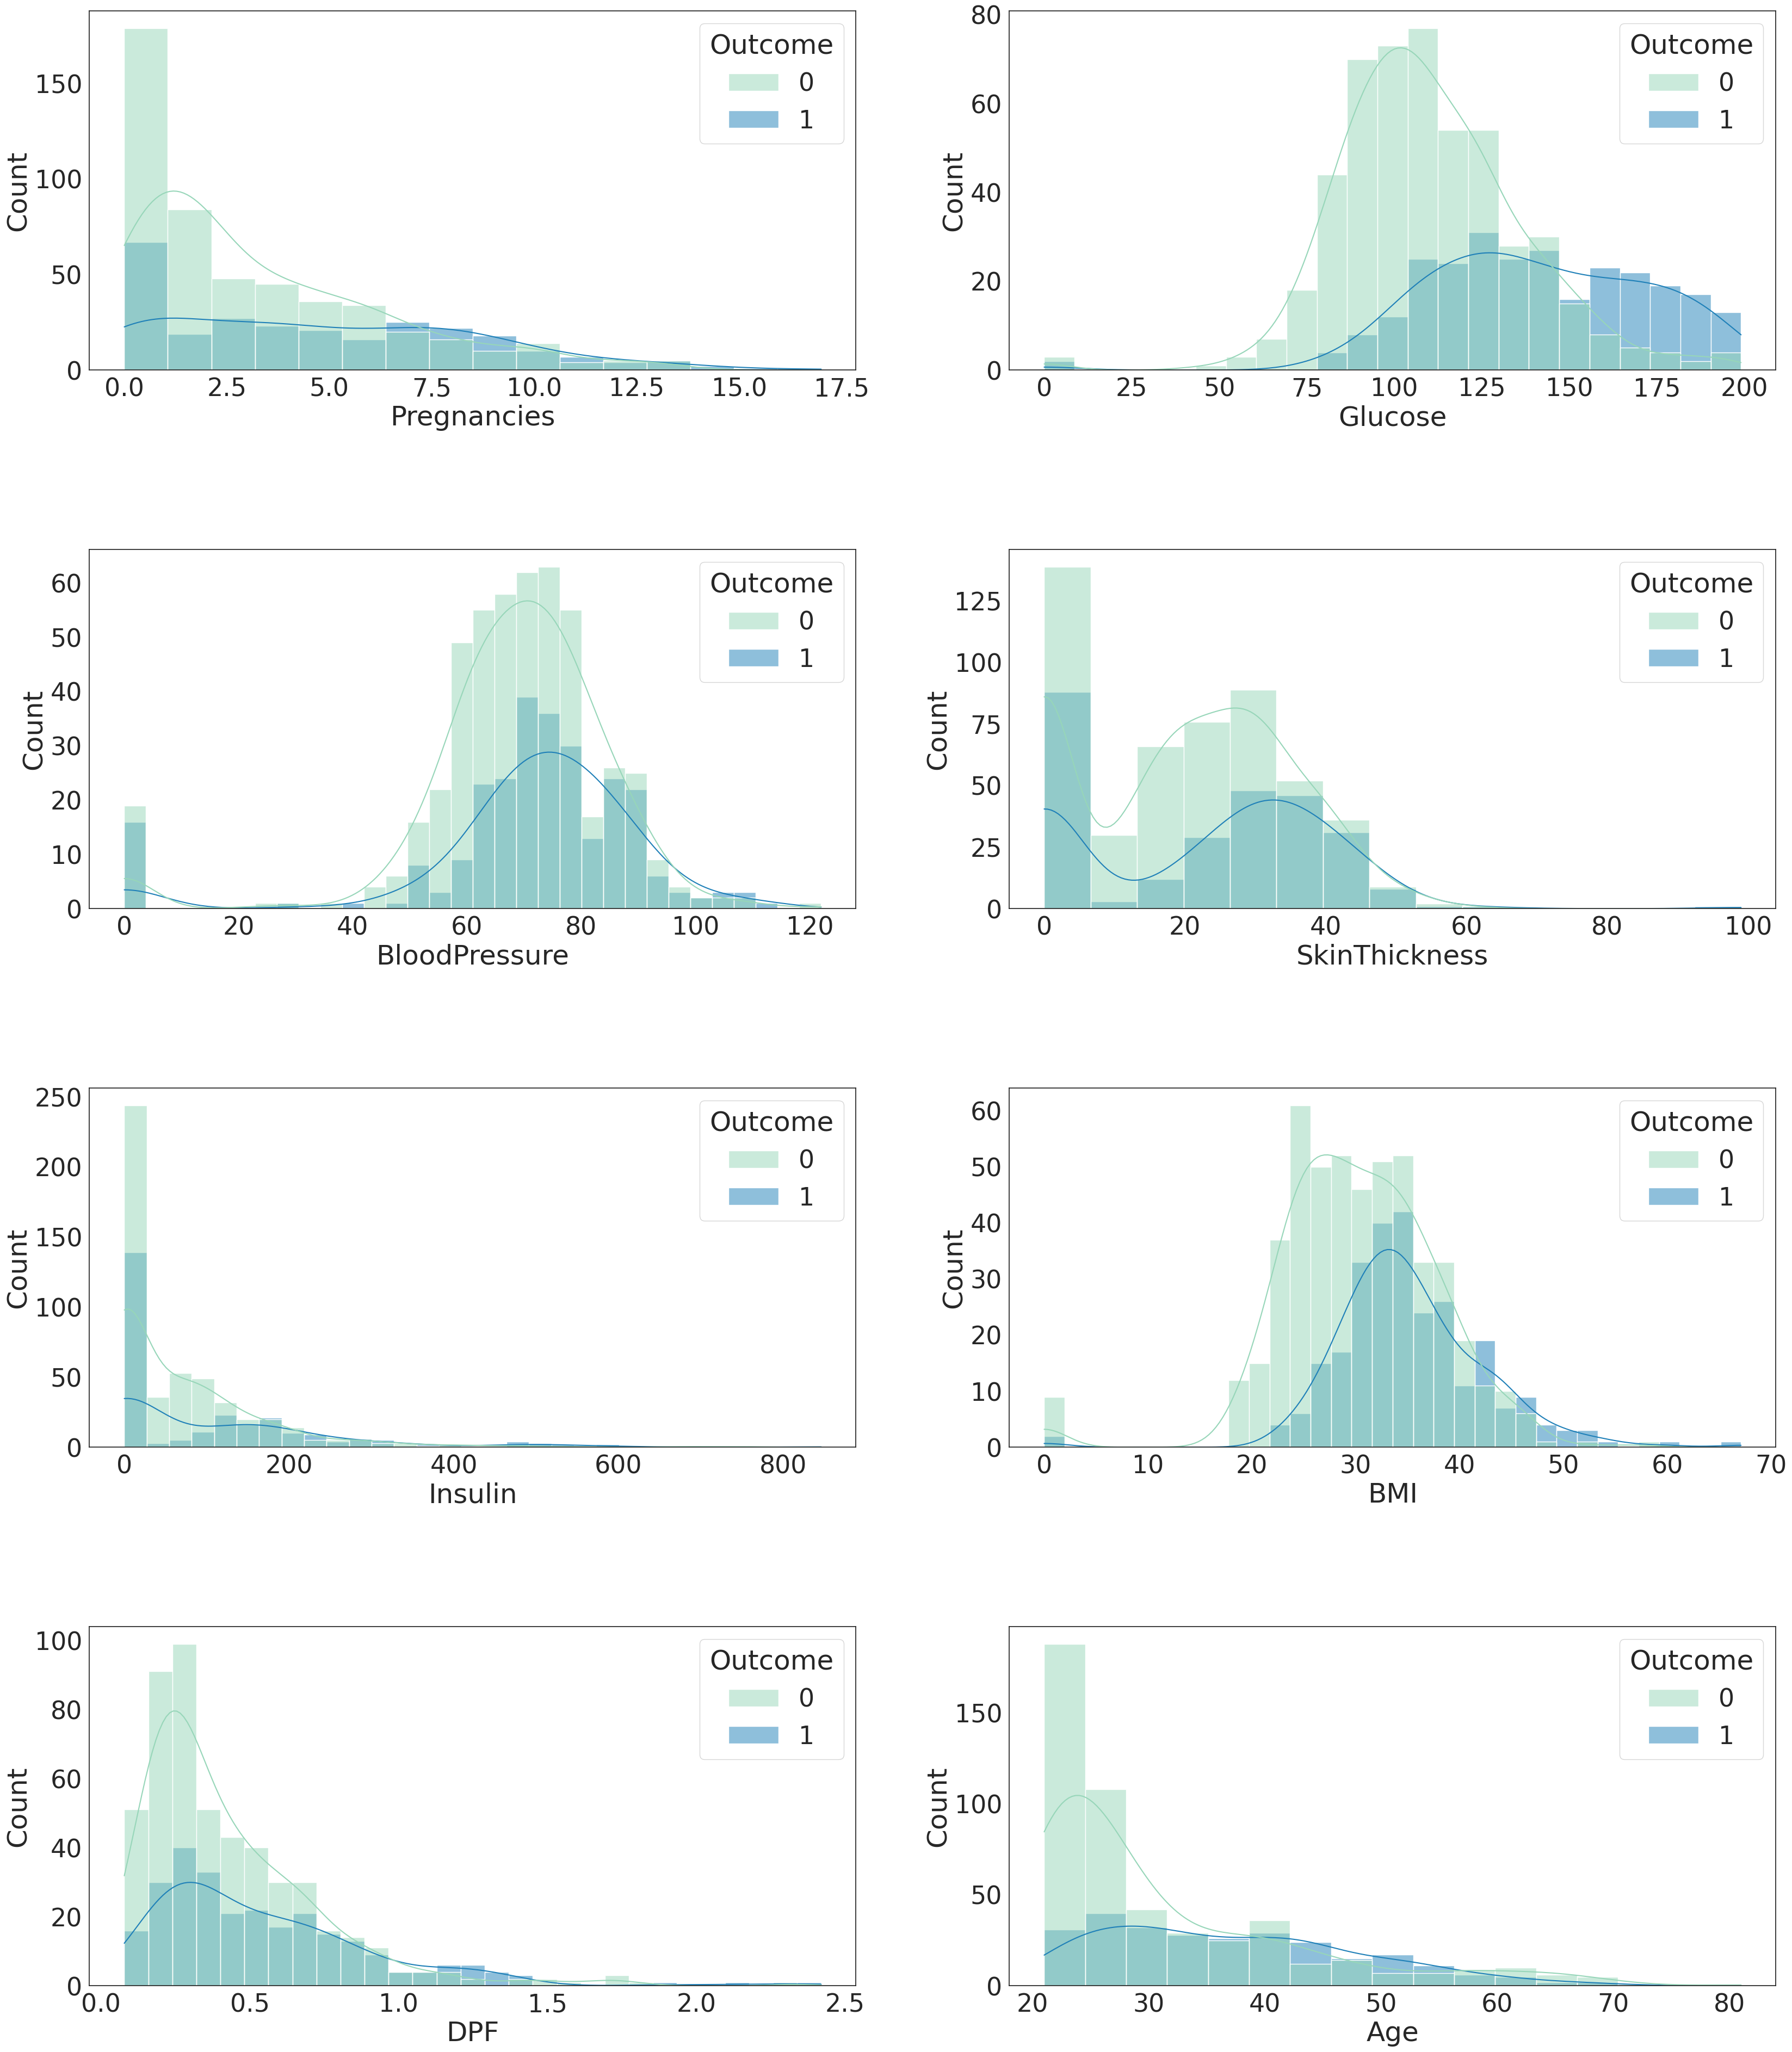

In [11]:
rcParams['figure.figsize'] = 40,60
sns.set(font_scale = 3)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=diabetes_df, x=name, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

In [12]:
zero_features = ['Pregnancies','Glucose','BloodPressure','SkinThickness',"Insulin",'BMI']
total_count = diabetes_df['Glucose'].count()

for feature in zero_features:
    zero_count = diabetes_df[diabetes_df[feature]==0][feature].count()
    print('{0} 0 number of cases {1}, percent is {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Pregnancies 0 number of cases 111, percent is 14.45 %
Glucose 0 number of cases 5, percent is 0.65 %
BloodPressure 0 number of cases 35, percent is 4.56 %
SkinThickness 0 number of cases 227, percent is 29.56 %
Insulin 0 number of cases 374, percent is 48.70 %
BMI 0 number of cases 11, percent is 1.43 %


In [13]:
diabetes_mean = diabetes_df[zero_features].mean()
diabetes_df[zero_features]=diabetes_df[zero_features].replace(0, diabetes_mean)

In [14]:
X = diabetes_df.iloc[:,:-1]
y = diabetes_df.iloc[:,-1]

In [15]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
X_scaled = scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [17]:
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

X_train.describe().style.apply(highlight_min, props='color:Black;background-color:Grey', axis=0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,4.315407,121.709154,72.144653,26.341978,118.600098,32.315027,0.468618,32.921875
std,2.916151,30.080570,12.113756,9.158041,94.570101,6.878494,0.339325,11.507539
min,1.000000,44.000000,24.000000,8.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,100.000000,64.000000,20.536458,79.799479,27.275000,0.240000,24.000000
50%,3.845052,118.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,138.250000,80.000000,32.000000,127.500000,36.325000,0.612250,40.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000


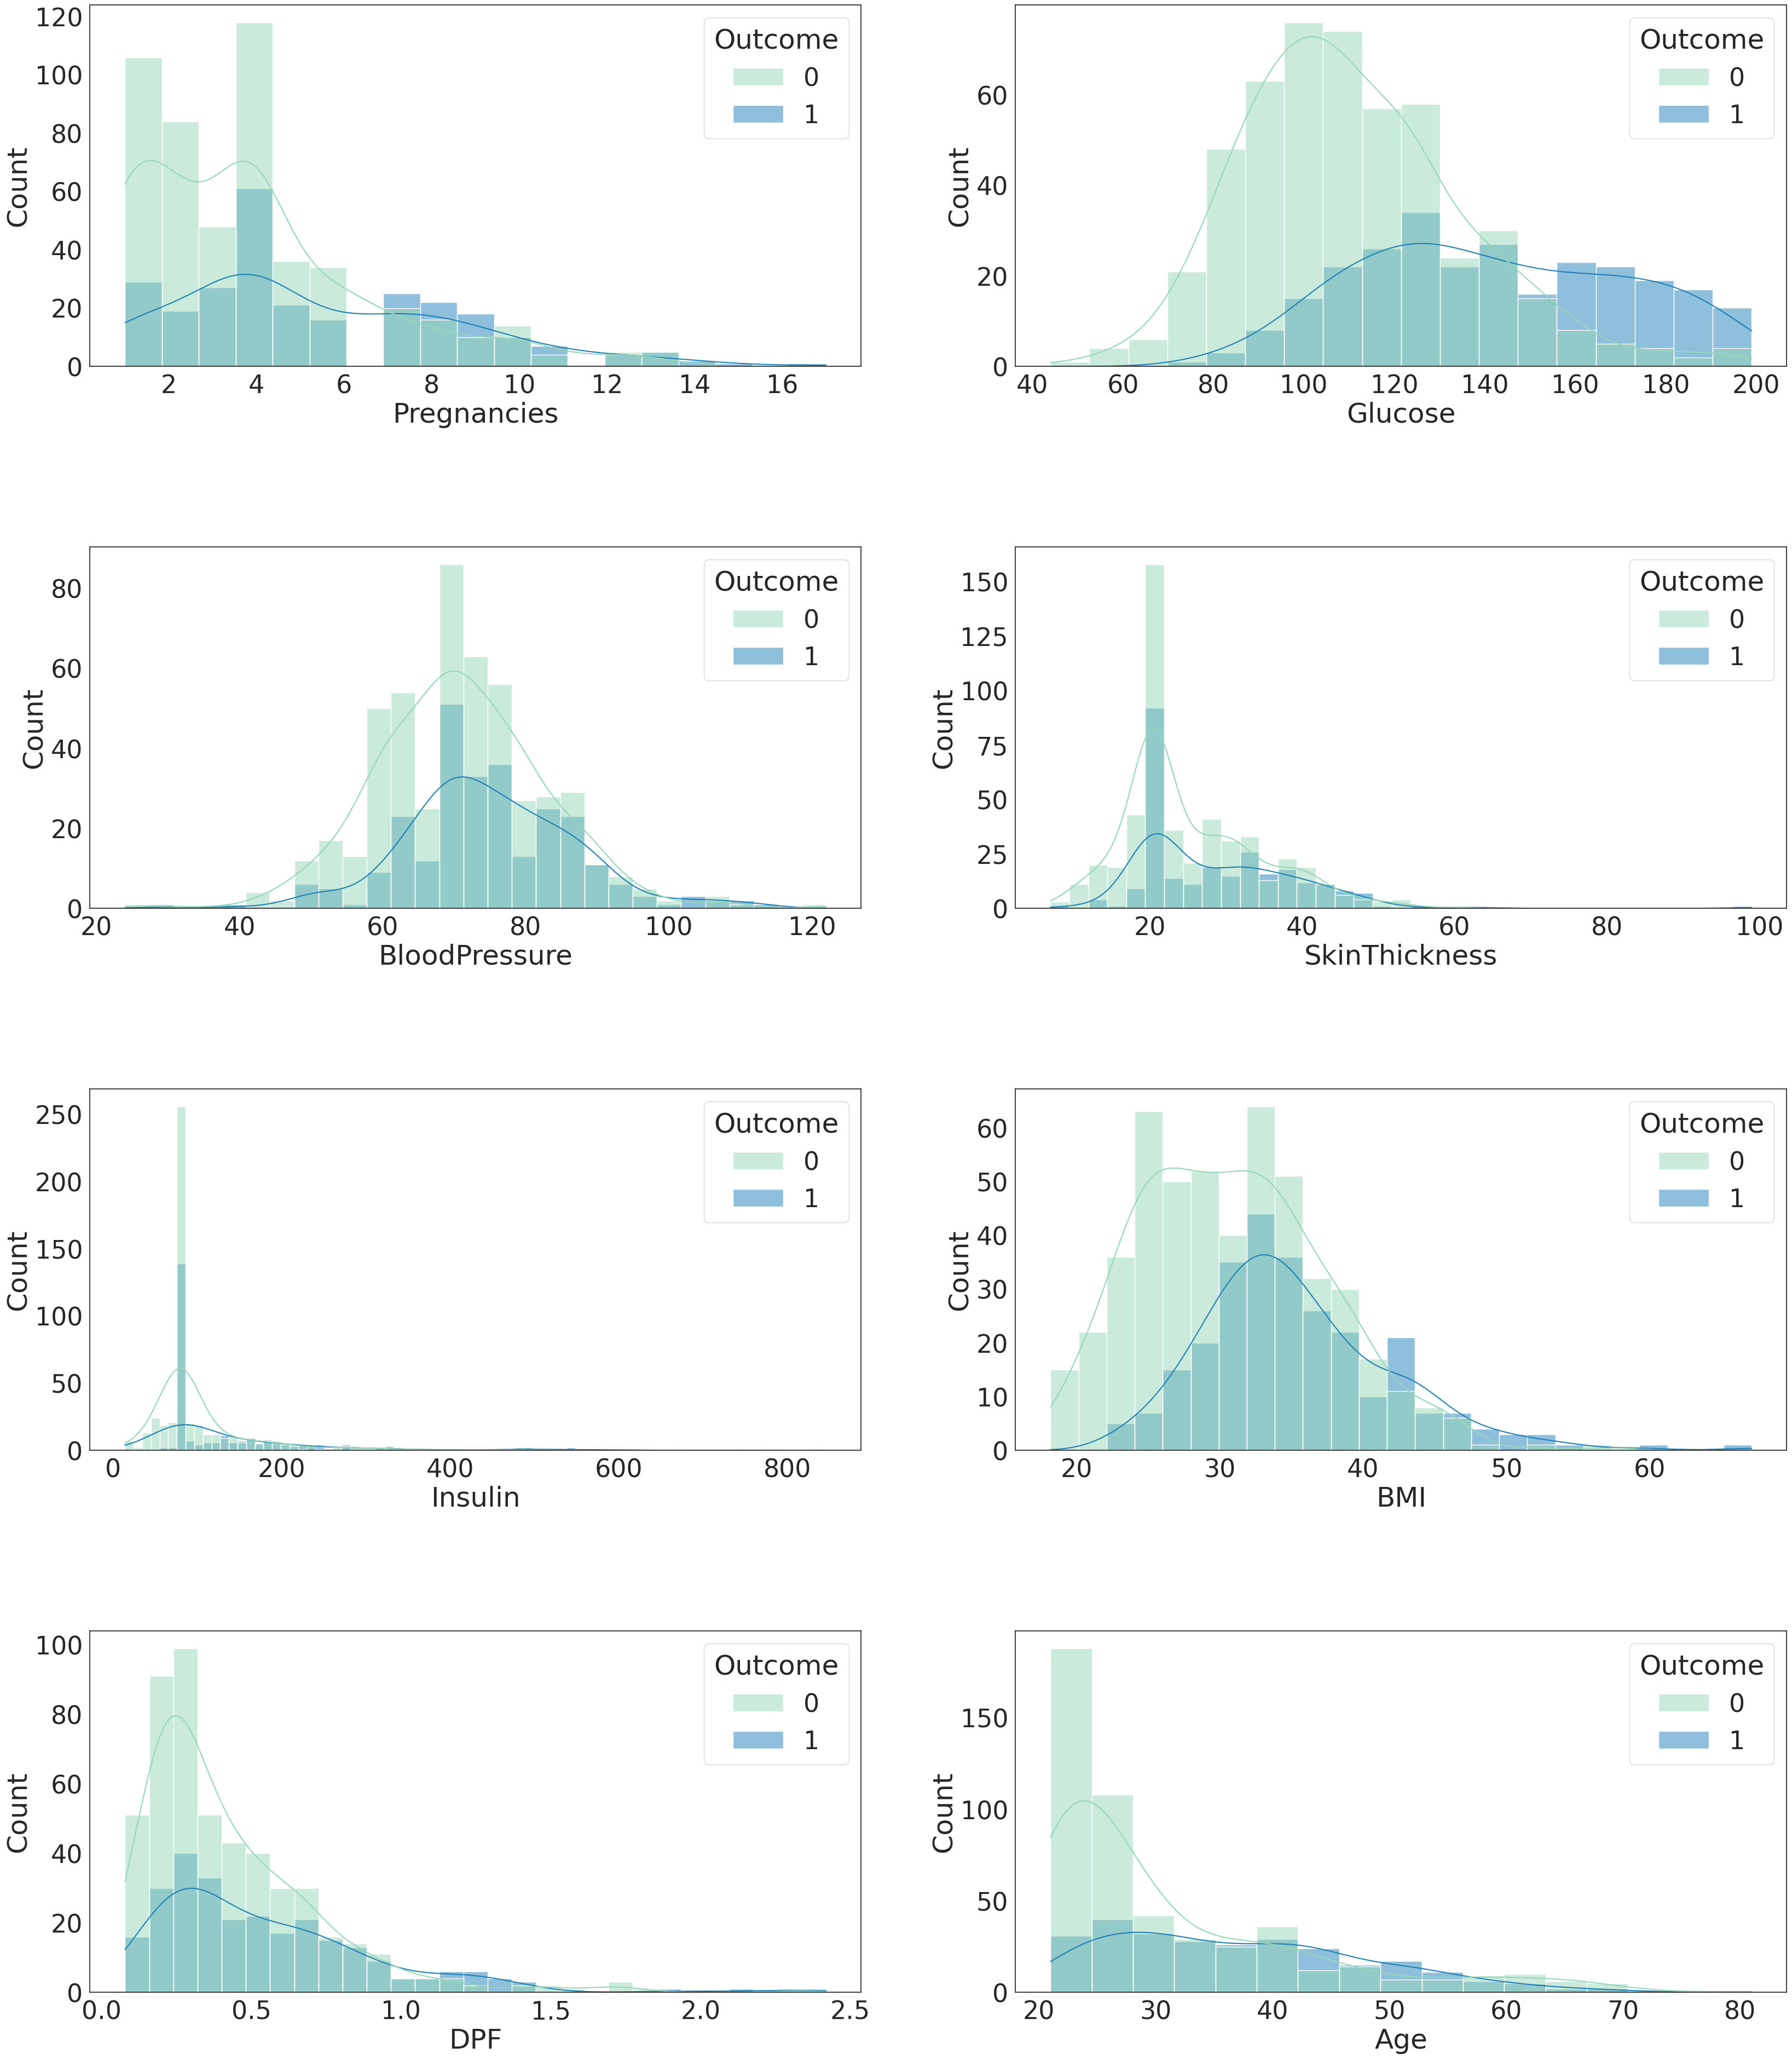

In [18]:
rcParams['figure.figsize'] = 40,60
sns.set(font_scale = 3)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=diabetes_df, x=name, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

Text(0.5, 1.0, 'Correlation Plot')

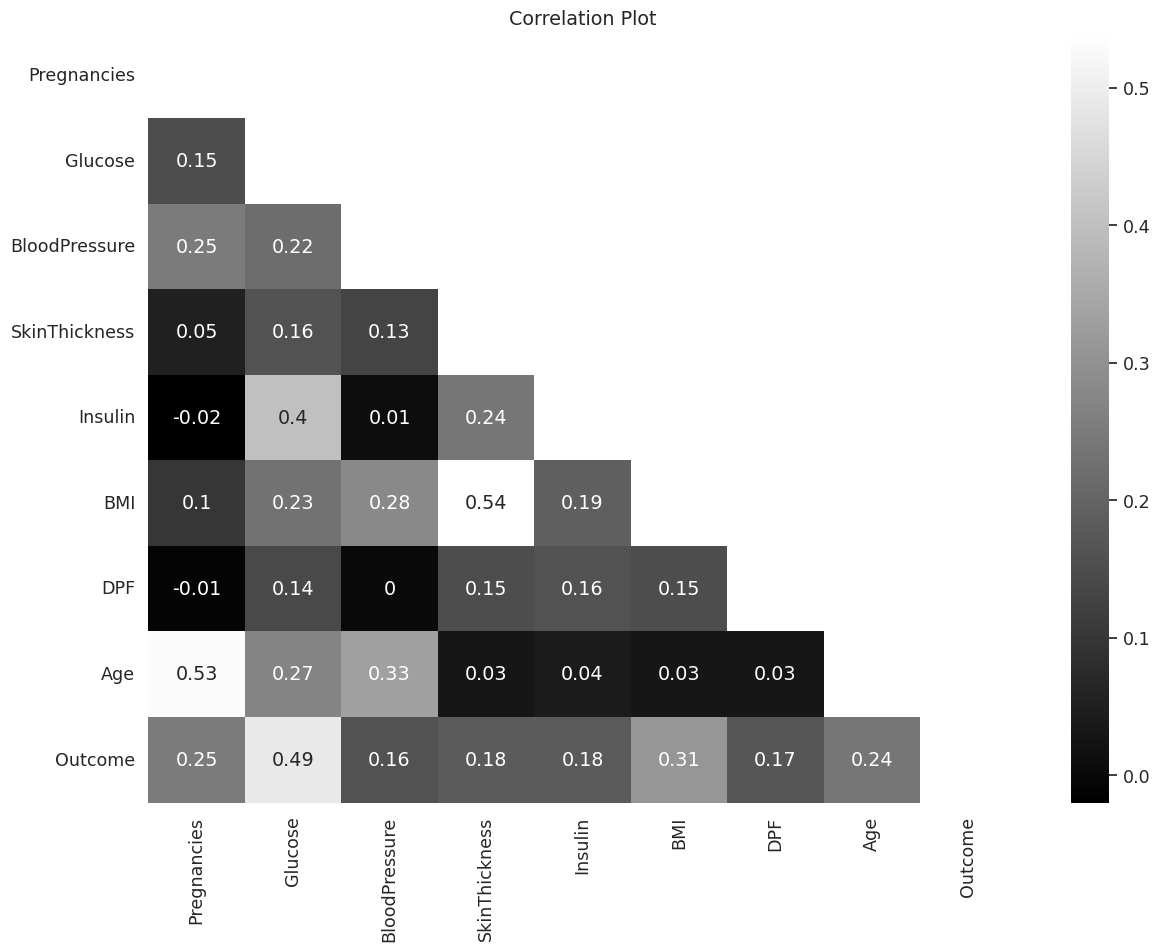

In [19]:
corr=diabetes_df.corr().round(2)

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
sns.set_palette("bright")
sns.set_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='gist_yarg_r',mask=mask,cbar=True)
plt.title('Correlation Plot')

The correlation between Outcome and Glucose is high. Glucoe seems to be the most important feature in model training.

In [21]:
fig = px.histogram(diabetes_df, x="Glucose",
                   color="Outcome",
                   marginal="box",
                   barmode ="overlay",
                   histnorm ='density'
                  )
fig.update_layout(
    title_font_color="black",
    legend_title_font_color="green",
    title={
        'text': "Glucose Histogram per Outcome",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)
fig.show()

In [24]:
X_train = diabetes_df.drop('Outcome',axis=1)
y_train = diabetes_df['Outcome']

<Axes: >

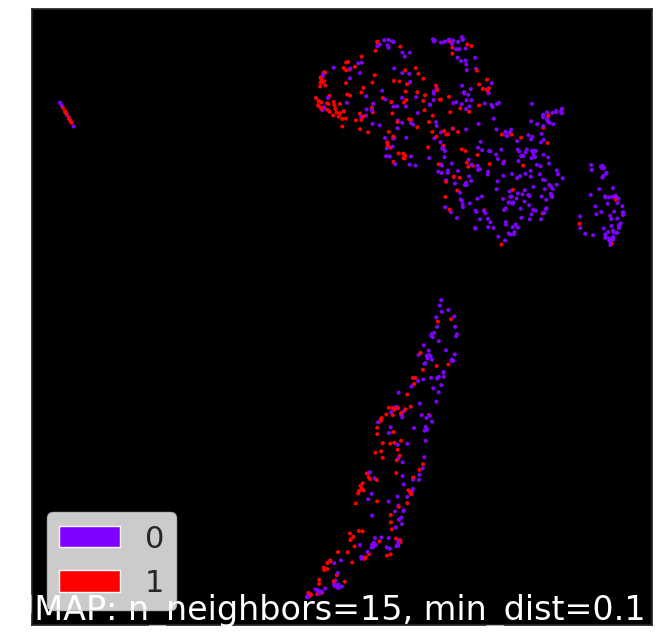

In [25]:
import umap
import umap.plot

mapper = umap.UMAP().fit(X_train)
umap.plot.points(mapper, labels=y_train, theme='fire')

In [26]:
from umap import UMAP

umap_3d = UMAP(n_components=3, init='random', random_state=0)
x_umap = umap_3d.fit_transform(X_train)
umap_df = pd.DataFrame(x_umap)
train_y_sr = pd.Series(y_train,name='label').astype(str)
print(type(x_umap))
new_df = pd.concat([umap_df,train_y_sr],axis=1)
fig = px.scatter_3d(
    new_df, x=0, y=1, z=2,
    color='label', labels={'color': 'number'}
)
fig.update_traces(marker_size=1.5)
fig.show()

<class 'numpy.ndarray'>


In [27]:
from pycaret.classification import *

In [28]:
clf1 = setup(data = diabetes_df,
             target = 'Outcome',
             preprocess = False,
             verbose = False)


### Model Comparison with AUC

The code compares different machine learning models to predict diabetes outcomes, ranking them based on **AUC (Area Under the ROC Curve)**.

- **Excludes** models like `lightgbm`, `xgboost`, and others from the comparison.
- **Selects** the top 5 models with the best AUC scores.

This helps identify the best-performing models for further tuning or evaluation.

In [29]:
top5 = compare_models(sort='AUC',
                      n_select = 5,
                      exclude=['lightgbm','xgboost','dummy','svm','ridge','knn','dt','nb','qda']
                     )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7730,0.8589,0.6480,0.6908,0.6641,0.4941,0.4978,0.1670
et,Extra Trees Classifier,0.7840,0.8521,0.6374,0.7193,0.6689,0.5111,0.5179,0.1770
catboost,CatBoost Classifier,0.7693,0.8516,0.6325,0.6812,0.6508,0.4805,0.4846,2.7610
lda,Linear Discriminant Analysis,0.7786,0.8503,0.5950,0.7224,0.6479,0.4902,0.4978,0.0250
lr,Logistic Regression,0.7785,0.8497,0.5950,0.7242,0.6475,0.4901,0.4986,0.6810
rf,Random Forest Classifier,0.7637,0.8467,0.6056,0.6770,0.6336,0.4626,0.4667,0.4360
ada,Ada Boost Classifier,0.7635,0.8309,0.6211,0.6803,0.6448,0.4692,0.4737,0.1210


Processing:   0%|          | 0/37 [00:00<?, ?it/s]

In [32]:
catboost = create_model('catboost')
rf = create_model('rf')
lr = create_model('lr')
lda = create_model('lda')
gbc = create_model('gbc')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8148,0.9233,0.6316,0.8000,0.7059,0.5735,0.5820
1,0.7963,0.8556,0.7368,0.7000,0.7179,0.5587,0.5591
2,0.7963,0.8842,0.6316,0.7500,0.6857,0.5367,0.5410
3,0.8148,0.8932,0.7368,0.7368,0.7368,0.5940,0.5940
4,0.7222,0.8256,0.4211,0.6667,0.5161,0.3350,0.3524
5,0.7037,0.7880,0.6316,0.5714,0.6000,0.3656,0.3668
6,0.6481,0.7429,0.3684,0.5000,0.4242,0.1792,0.1835
7,0.8302,0.9175,0.8333,0.7143,0.7692,0.6362,0.6409
8,0.7736,0.8492,0.6667,0.6667,0.6667,0.4952,0.4952


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7963,0.9256,0.5789,0.7857,0.6667,0.5248,0.5375
1,0.7778,0.8203,0.6842,0.6842,0.6842,0.5128,0.5128
2,0.8148,0.8932,0.6842,0.7647,0.7222,0.5840,0.5860
3,0.8333,0.8767,0.7368,0.7778,0.7568,0.6301,0.6307
4,0.6667,0.8150,0.2632,0.5556,0.3571,0.1692,0.1908
5,0.6852,0.7887,0.5789,0.5500,0.5641,0.3180,0.3182
6,0.6852,0.7346,0.4737,0.5625,0.5143,0.2839,0.2862
7,0.8302,0.9048,0.7778,0.7368,0.7568,0.6265,0.6270
8,0.7547,0.8310,0.6111,0.6471,0.6286,0.4457,0.4461


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9308,0.7368,0.9333,0.8235,0.7441,0.7551
1,0.8148,0.8286,0.7368,0.7368,0.7368,0.5940,0.5940
2,0.7222,0.8571,0.5263,0.6250,0.5714,0.3682,0.3711
3,0.8148,0.8782,0.5789,0.8462,0.6875,0.5624,0.5828
4,0.7037,0.7985,0.3684,0.6364,0.4667,0.2812,0.3013
5,0.6852,0.7835,0.5263,0.5556,0.5405,0.3014,0.3016
6,0.7407,0.8015,0.4211,0.7273,0.5333,0.3710,0.3976
7,0.8113,0.9159,0.7222,0.7222,0.7222,0.5794,0.5794
8,0.7547,0.8460,0.6111,0.6471,0.6286,0.4457,0.4461


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9338,0.7368,0.9333,0.8235,0.7441,0.7551
1,0.8148,0.8301,0.7368,0.7368,0.7368,0.5940,0.5940
2,0.7222,0.8466,0.5263,0.6250,0.5714,0.3682,0.3711
3,0.8148,0.8857,0.5789,0.8462,0.6875,0.5624,0.5828
4,0.7037,0.8015,0.3684,0.6364,0.4667,0.2812,0.3013
5,0.6852,0.7865,0.5263,0.5556,0.5405,0.3014,0.3016
6,0.7222,0.8000,0.4211,0.6667,0.5161,0.3350,0.3524
7,0.8302,0.9206,0.7222,0.7647,0.7429,0.6163,0.6168
8,0.7547,0.8397,0.6111,0.6471,0.6286,0.4457,0.4461


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8148,0.9429,0.7368,0.7368,0.7368,0.5940,0.5940
1,0.7963,0.8782,0.7368,0.7000,0.7179,0.5587,0.5591
2,0.8148,0.8977,0.6842,0.7647,0.7222,0.5840,0.5860
3,0.8519,0.9008,0.6842,0.8667,0.7647,0.6588,0.6686
4,0.7222,0.8075,0.4211,0.6667,0.5161,0.3350,0.3524
5,0.6481,0.7669,0.6316,0.5000,0.5581,0.2723,0.2775
6,0.6852,0.7669,0.4737,0.5625,0.5143,0.2839,0.2862
7,0.8113,0.8984,0.7222,0.7222,0.7222,0.5794,0.5794
8,0.7736,0.8714,0.6667,0.6667,0.6667,0.4952,0.4952


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

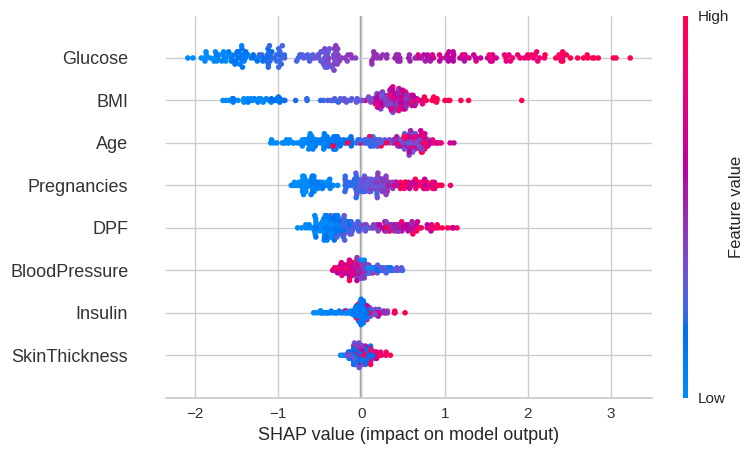

In [33]:
interpret_model(catboost)


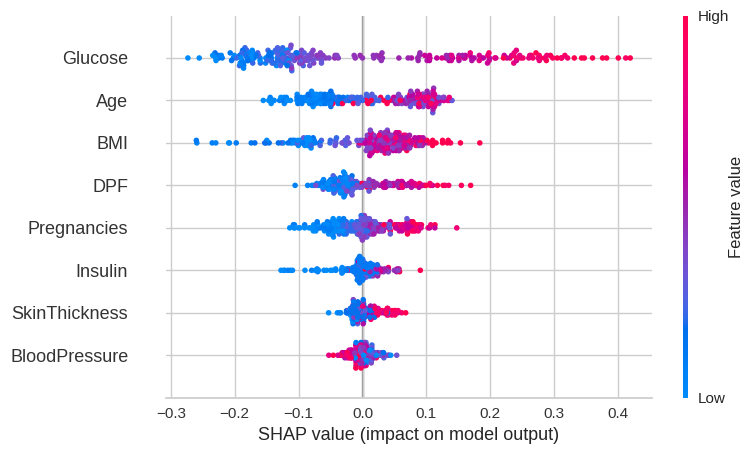

In [34]:
interpret_model(rf)


This code tunes the hyperparameters of five different machine learning models to improve their performance, specifically optimizing for the AUC (Area Under the ROC Curve) score, which measures how well the model distinguishes between the two classes (diabetes or no diabetes).

tune_model(): This function fine-tunes a model's settings (like learning rate, depth, etc.) to make it perform better.
optimize = 'AUC': The tuning process aims to maximize the AUC score, which helps in evaluating how well the model classifies both classes.

In [35]:
tuned_catboost = tune_model(catboost, optimize = 'AUC')
tuned_rf = tune_model(rf, optimize = 'AUC')
tuned_lr = tune_model(lr, optimize = 'AUC')
tuned_lda = tune_model(lda, optimize = 'AUC')
tuned_gbc = tune_model(gbc, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.9474,0.6842,0.8125,0.7429,0.6209,0.6259
1,0.8148,0.8346,0.7368,0.7368,0.7368,0.5940,0.5940
2,0.7963,0.8617,0.6316,0.7500,0.6857,0.5367,0.5410
3,0.8148,0.8842,0.7368,0.7368,0.7368,0.5940,0.5940
4,0.7407,0.8120,0.4211,0.7273,0.5333,0.3710,0.3976
5,0.6667,0.7774,0.6316,0.5217,0.5714,0.3027,0.3064
6,0.7407,0.7940,0.5789,0.6471,0.6111,0.4176,0.4190
7,0.8302,0.9079,0.8333,0.7143,0.7692,0.6362,0.6409
8,0.7736,0.8571,0.5556,0.7143,0.6250,0.4664,0.4740


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.9353,0.5789,0.9167,0.7097,0.6010,0.6322
1,0.7778,0.8241,0.6842,0.6842,0.6842,0.5128,0.5128
2,0.8148,0.8647,0.6316,0.8000,0.7059,0.5735,0.5820
3,0.8333,0.9038,0.6842,0.8125,0.7429,0.6209,0.6259
4,0.7037,0.8331,0.2632,0.7143,0.3846,0.2408,0.2929
5,0.7407,0.7805,0.6316,0.6316,0.6316,0.4316,0.4316
6,0.7407,0.7744,0.5263,0.6667,0.5882,0.4028,0.4088
7,0.8302,0.9238,0.7222,0.7647,0.7429,0.6163,0.6168
8,0.7547,0.8651,0.6111,0.6471,0.6286,0.4457,0.4461


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9293,0.7368,0.9333,0.8235,0.7441,0.7551
1,0.8148,0.8301,0.7368,0.7368,0.7368,0.5940,0.5940
2,0.7222,0.8571,0.5263,0.6250,0.5714,0.3682,0.3711
3,0.8148,0.8827,0.5789,0.8462,0.6875,0.5624,0.5828
4,0.7037,0.8015,0.3684,0.6364,0.4667,0.2812,0.3013
5,0.6852,0.7880,0.5263,0.5556,0.5405,0.3014,0.3016
6,0.7593,0.8060,0.4737,0.7500,0.5806,0.4236,0.4456
7,0.7925,0.9159,0.7222,0.6842,0.7027,0.5435,0.5439
8,0.7547,0.8524,0.6111,0.6471,0.6286,0.4457,0.4461


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9074,0.9368,0.7895,0.9375,0.8571,0.7894,0.7958
1,0.8148,0.8361,0.7368,0.7368,0.7368,0.5940,0.5940
2,0.7222,0.8526,0.5263,0.6250,0.5714,0.3682,0.3711
3,0.8148,0.8932,0.5789,0.8462,0.6875,0.5624,0.5828
4,0.7037,0.8015,0.3684,0.6364,0.4667,0.2812,0.3013
5,0.7222,0.7940,0.5789,0.6111,0.5946,0.3836,0.3839
6,0.7407,0.7865,0.4737,0.6923,0.5625,0.3874,0.4014
7,0.8491,0.9238,0.7222,0.8125,0.7647,0.6542,0.6566
8,0.7358,0.8381,0.5556,0.6250,0.5882,0.3948,0.3963


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6481,0.9368,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6481,0.8316,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.6481,0.8797,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.6481,0.9053,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6481,0.8391,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.6481,0.7835,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.6481,0.7774,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.6604,0.9270,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.6604,0.8460,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


stack_models(): This function combines multiple models into a single ensemble model. It trains the models in parallel and uses the meta-model to make the final predictions based on the outputs of the base models.
estimator_list = top5: The base models (the ones you want to stack) are provided from the list top5 (the top 5 models with the best AUC scores).
meta_model = top5[0]: The meta-model (the model that will combine the predictions from the base models) is set to the first model in the top5 list.
optimize = 'AUC': The stacked model is optimized to maximize the AUC score.

In [36]:
stack_model = stack_models(estimator_list = top5, meta_model = top5[0],optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.8947,0.5789,0.9167,0.7097,0.6010,0.6322
1,0.7778,0.8602,0.6842,0.6842,0.6842,0.5128,0.5128
2,0.7778,0.8782,0.5263,0.7692,0.6250,0.4749,0.4921
3,0.8333,0.9173,0.6842,0.8125,0.7429,0.6209,0.6259
4,0.6296,0.7489,0.2105,0.4444,0.2857,0.0769,0.0867
5,0.7222,0.8256,0.7368,0.5833,0.6512,0.4255,0.4336
6,0.7222,0.7759,0.5263,0.6250,0.5714,0.3682,0.3711
7,0.7925,0.8635,0.7778,0.6667,0.7179,0.5553,0.5594
8,0.7547,0.8476,0.6667,0.6316,0.6486,0.4605,0.4609


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

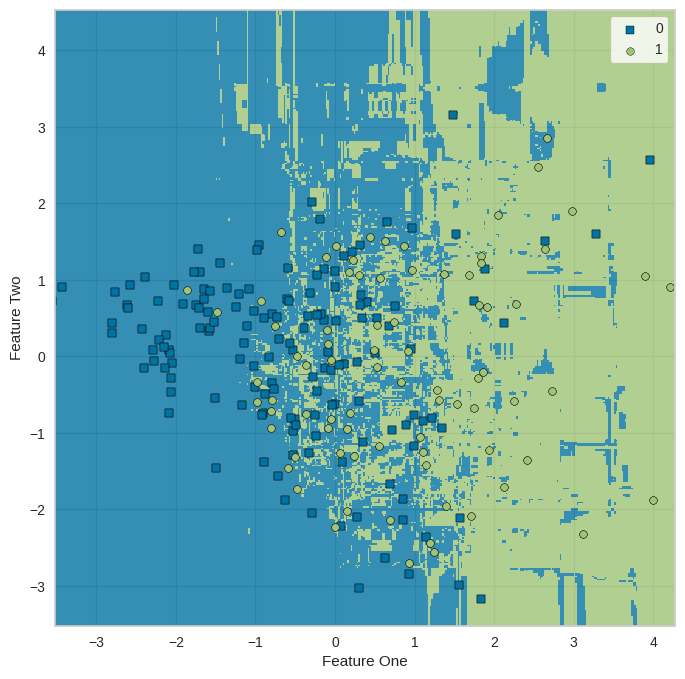

In [37]:
plt.figure(figsize=(8, 8))
plot_model(stack_model, plot='boundary')

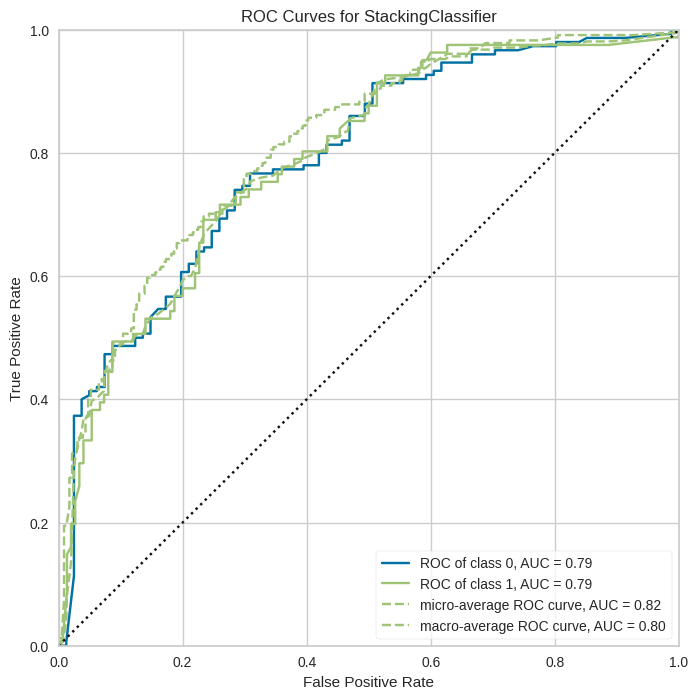

In [38]:
plt.figure(figsize=(8, 8))
plot_model(stack_model, plot = 'auc')

In [39]:
#prediction
pred = stack_model.predict(X_test)
pred_proba = stack_model.predict_proba(X_test)[:,1]
#Accuracy
confusion_stack = get_clf_eval(y_test,pred,pred_proba)

accuracy: 0.7188, precision: 0.5904, recall: 0.7101,    F1: 0.6447, AUC:0.8072


Text(0.5, 1.0, 'Confusion Matrix (Stacking)')

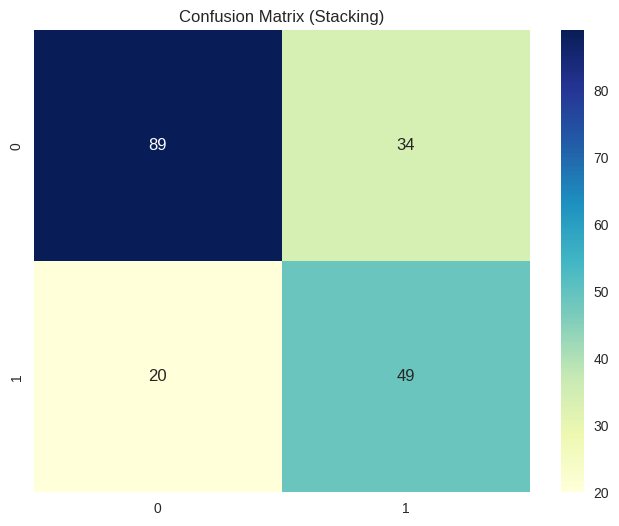

In [40]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_stack, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (Stacking)')

In [41]:
blend_soft = blend_models(estimator_list = top5, optimize = 'AUC',method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8704,0.9474,0.6842,0.9286,0.7879,0.6976,0.7145
1,0.7778,0.8602,0.7368,0.6667,0.7000,0.5242,0.5259
2,0.7593,0.8917,0.5263,0.7143,0.6061,0.4384,0.4490
3,0.7963,0.9113,0.6316,0.7500,0.6857,0.5367,0.5410
4,0.7778,0.8241,0.4737,0.8182,0.6000,0.4609,0.4939
5,0.6852,0.7880,0.5263,0.5556,0.5405,0.3014,0.3016
6,0.7222,0.7895,0.4737,0.6429,0.5455,0.3520,0.3605
7,0.8113,0.9190,0.7222,0.7222,0.7222,0.5794,0.5794
8,0.7925,0.8683,0.6667,0.7059,0.6857,0.5310,0.5315


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

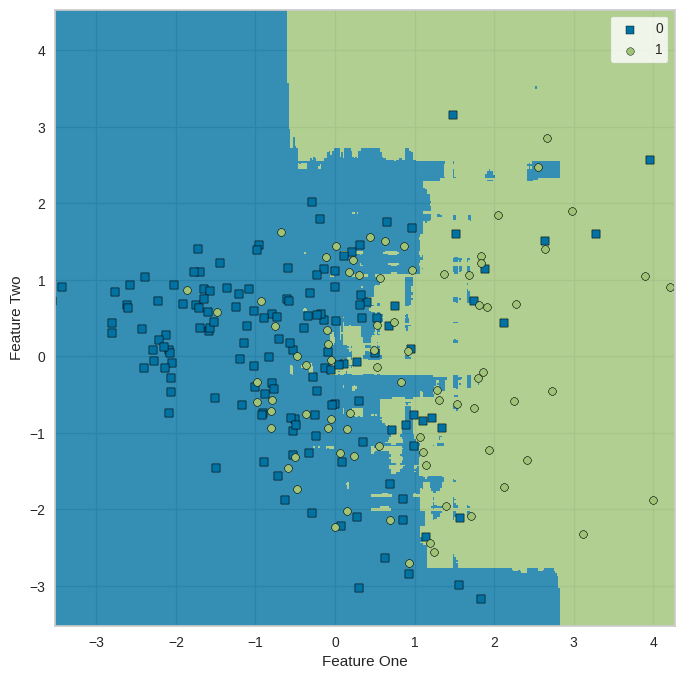

In [42]:
plt.figure(figsize=(8, 8))
plot_model(blend_soft, plot='boundary')

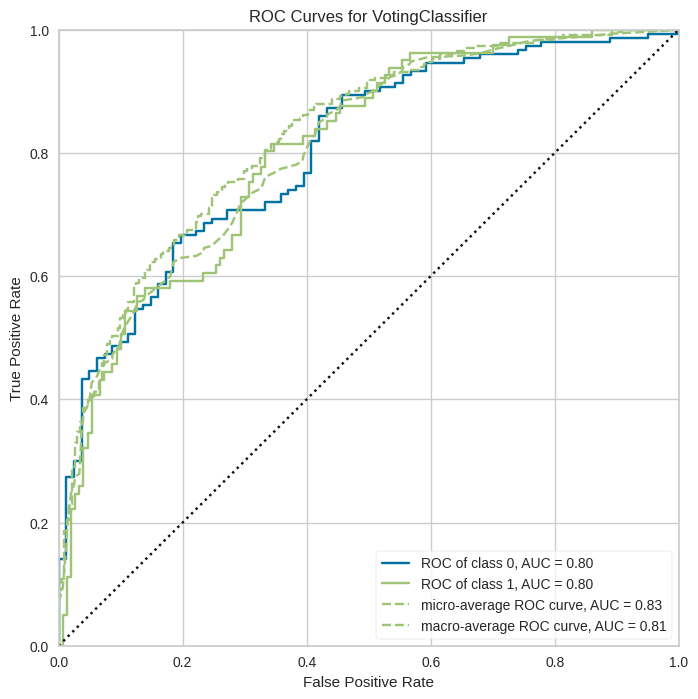

In [43]:
plt.figure(figsize=(8, 8))
plot_model(blend_soft, plot = 'auc')

In [44]:
#prediction
pred = blend_soft.predict(X_test)
pred_proba = blend_soft.predict_proba(X_test)[:,1]
#Accuracy
confusion_soft = get_clf_eval(y_test,pred,pred_proba)

accuracy: 0.9010, precision: 0.9167, recall: 0.7971,    F1: 0.8527, AUC:0.9341


Text(0.5, 1.0, 'Confusion Matrix (Soft Blending)')

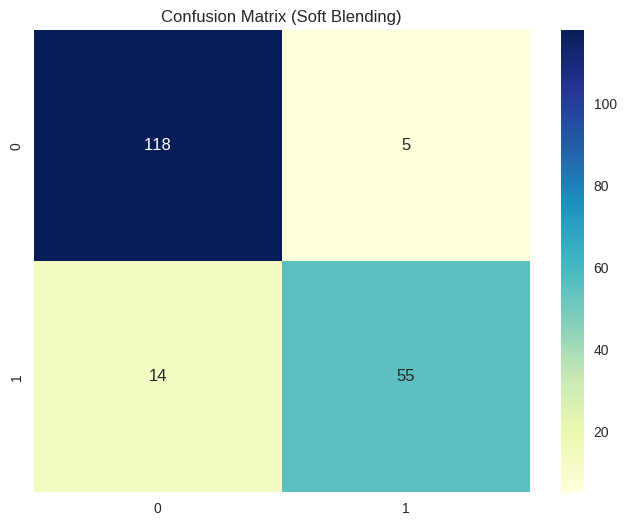

In [45]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_soft, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (Soft Blending)')

In [46]:
blend_hard = blend_models(estimator_list = top5, optimize = 'AUC',method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.0000,0.7368,0.9333,0.8235,0.7441,0.7551
1,0.7963,0.0000,0.7368,0.7000,0.7179,0.5587,0.5591
2,0.7407,0.0000,0.4737,0.6923,0.5625,0.3874,0.4014
3,0.8519,0.0000,0.6842,0.8667,0.7647,0.6588,0.6686
4,0.7407,0.0000,0.3684,0.7778,0.5000,0.3538,0.3989
5,0.7037,0.0000,0.6316,0.5714,0.6000,0.3656,0.3668
6,0.6667,0.0000,0.3684,0.5385,0.4375,0.2123,0.2200
7,0.8113,0.0000,0.7778,0.7000,0.7368,0.5904,0.5924
8,0.7736,0.0000,0.6111,0.6875,0.6471,0.4812,0.4830


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

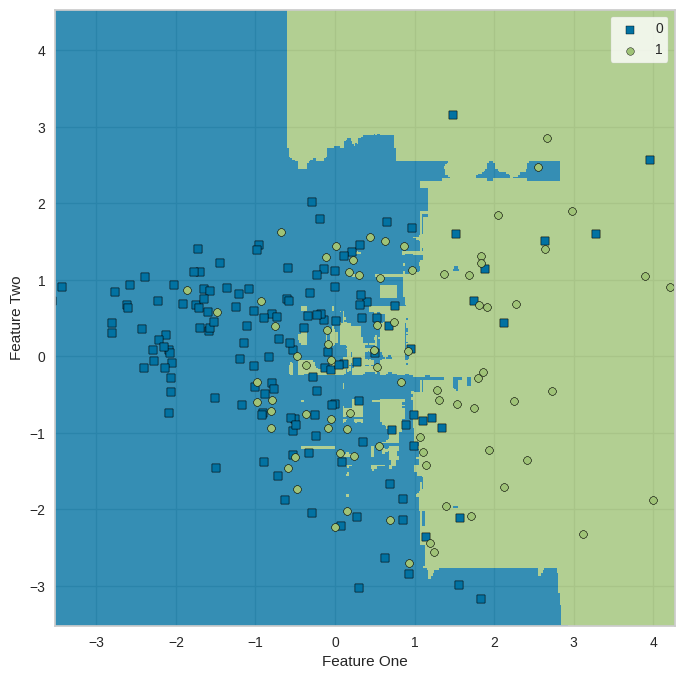

In [47]:
plt.figure(figsize=(8, 8))
plot_model(blend_hard, plot='boundary')

In [48]:
#prediction
pred = blend_hard.predict(X_test)
#Accuracy
confusion_hard = confusion_matrix( y_test, pred)
accuracy = accuracy_score(y_test , pred)
precision = precision_score(y_test , pred)
recall = recall_score(y_test , pred)
f1 = f1_score(y_test,pred)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
F1: {3:.4f}'.format(accuracy, precision, recall, f1))

accuracy: 0.9062, precision: 0.9180, recall: 0.8116,F1: 0.8615


Text(0.5, 1.0, 'Confusion Matrix (Hard Blending)')

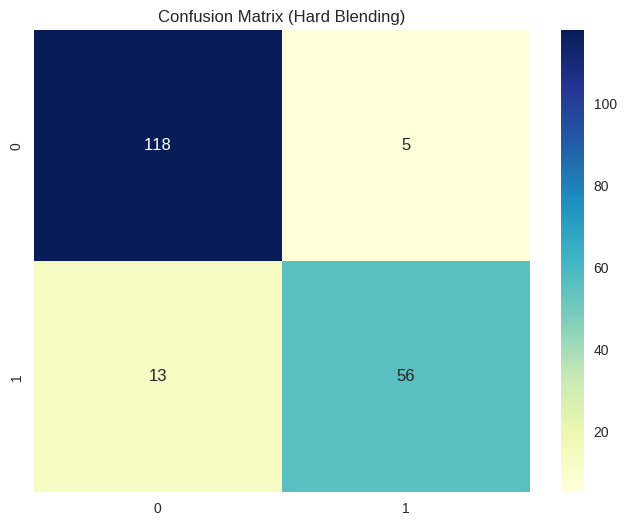

In [49]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_hard, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (Hard Blending)')

In [50]:
cali_model = calibrate_model(blend_soft)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8704,0.9444,0.6842,0.9286,0.7879,0.6976,0.7145
1,0.7778,0.8602,0.7368,0.6667,0.7000,0.5242,0.5259
2,0.7593,0.8797,0.5263,0.7143,0.6061,0.4384,0.4490
3,0.7963,0.9023,0.6316,0.7500,0.6857,0.5367,0.5410
4,0.7407,0.8301,0.3684,0.7778,0.5000,0.3538,0.3989
5,0.7037,0.7820,0.5789,0.5789,0.5789,0.3504,0.3504
6,0.7222,0.7895,0.4737,0.6429,0.5455,0.3520,0.3605
7,0.8113,0.9206,0.7222,0.7222,0.7222,0.5794,0.5794
8,0.7547,0.8571,0.6111,0.6471,0.6286,0.4457,0.4461


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [51]:
final_model = finalize_model(cali_model)

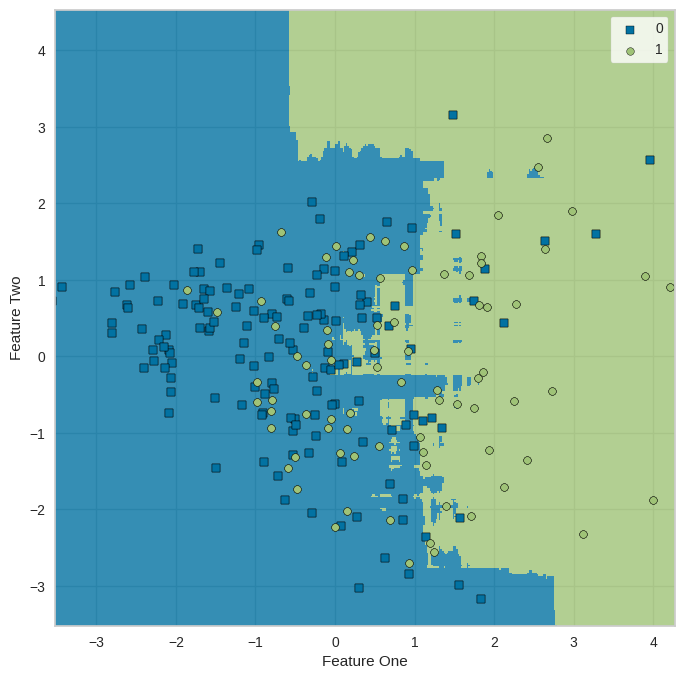

In [53]:
plt.figure(figsize=(8, 8))
plot_model(final_model, plot='boundary')

In [54]:
#prediction
pred = final_model.predict(X_test)
#Accuracy
final_model = confusion_matrix( y_test, pred)
accuracy = accuracy_score(y_test , pred)
precision = precision_score(y_test , pred)
recall = recall_score(y_test , pred)
f1 = f1_score(y_test,pred)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
F1: {3:.4f}'.format(accuracy, precision, recall, f1))

accuracy: 0.8958, precision: 0.9016, recall: 0.7971,F1: 0.8462


Text(0.5, 1.0, 'Confusion Matrix (final_model)')

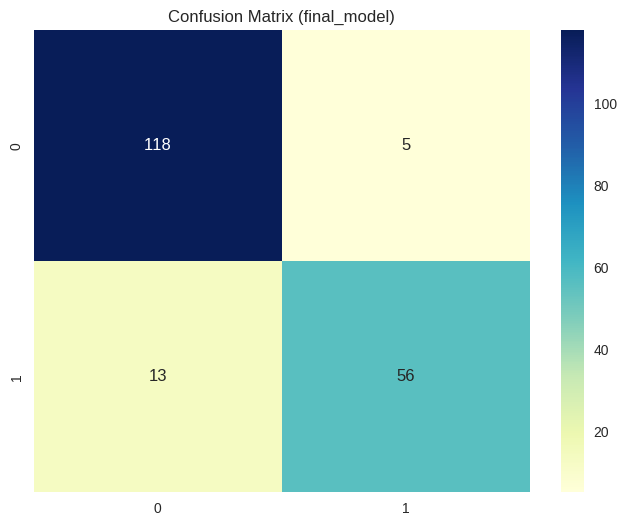

In [55]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_hard, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (final_model)')